In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [67]:
# categorize age pandas qcut

A=pd.cut(train.Age,bins=6)
A

0           (41.667, 52.5]
1           (74.167, 85.0]
2           (41.667, 52.5]
3         (19.935, 30.833]
4         (19.935, 30.833]
                ...       
381104    (63.333, 74.167]
381105    (19.935, 30.833]
381106    (19.935, 30.833]
381107    (63.333, 74.167]
381108      (41.667, 52.5]
Name: Age, Length: 381109, dtype: category
Categories (6, interval[float64]): [(19.935, 30.833] < (30.833, 41.667] < (41.667, 52.5] < (52.5, 63.333] < (63.333, 74.167] < (74.167, 85.0]]

In [3]:
test = pd.read_csv("test.csv")
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
train_id = train["id"]
test_id = test["id"]

In [5]:
train=train.drop('id', axis=1)
test=test.drop('id', axis=1)

In [6]:
train["Gender"] = train["Gender"].replace({'Male':0, 'Female':1})
train["Vehicle_Damage"] = train["Vehicle_Damage"].replace({'Yes':1,"No":0})

In [7]:
test["Gender"] = test["Gender"].replace({'Male':0, 'Female':1})
test["Vehicle_Damage"] = test["Vehicle_Damage"].replace({'Yes':1,"No":0})

In [8]:
map_dict={'> 2 Years':2,'1-2 Year':1,'< 1 Year':0}
train['Vehicle_Age']=train['Vehicle_Age'].map(map_dict)

In [9]:
map_dict={'> 2 Years':2,'1-2 Year':1,'< 1 Year':0}
test['Vehicle_Age']=test['Vehicle_Age'].map(map_dict)

In [10]:
def analysis(df, target):
    instance = df.shape[0]
    types=df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.T.apply(pd.Series.unique,1)
    nulls= df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(pd.Series.nunique)
    null_perc = (df.isnull().sum()/instance)*100
    skewness = df.skew()
    kurtosis = df.kurt()
    
    corr = df.corr()[target]
    str = pd.concat([types, counts,uniques, nulls,distincts, null_perc, skewness, kurtosis, corr], axis = 1, sort=False)
    corr_col = 'corr '  + target
    cols = ['types', 'counts','uniques', 'nulls','distincts', 'null_perc', 'skewness', 'kurtosis', corr_col ]
    str.columns = cols
    return str

In [11]:
details = analysis(train, "Response")
details.sort_values("corr Response",ascending=False)

,types,counts,uniques,nulls,distincts,null_perc,skewness,kurtosis,corr Response
Response,int64,381109,"[1.0, 0.0]",0,2,0.0,2.301906,3.298788,1.000000
Vehicle_Damage,int64,381109,"[1.0, 0.0]",0,2,0.0,-0.019507,-1.999630,0.354400
Vehicle_Age,int64,381109,"[2.0, 1.0, 0.0]",0,3,0.0,0.252896,-0.792253,0.221874
Age,int64,381109,"[44.0, 76.0, 47.0, 21.0, 29.0, 24.0, 23.0, 56....",0,66,0.0,0.672539,-0.565655,0.111147
Annual_Premium,float64,381109,"[40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...",0,48838,0.0,1.766087,34.004569,0.022575
Region_Code,float64,381109,"[28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...",0,53,0.0,-0.115266,-0.867857,0.010570
Driving_License,int64,381109,"[1.0, 0.0]",0,2,0.0,-21.595182,464.354302,0.010155
Vintage,int64,381109,"[217.0, 183.0, 27.0, 203.0, 39.0, 176.0, 249.0...",0,290,0.0,0.003030,-1.200688,-0.001050
Gender,int64,381109,"[0.0, 1.0]",0,2,0.0,0.163590,-1.973249,-0.052440
Policy_Sales_Channel,float64,381109,"[26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...",0,155,0.0,-0.900008,-0.970810,-0.139042


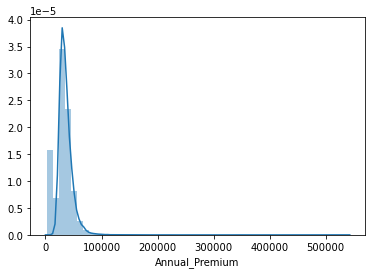

In [12]:
import seaborn as sns
sns.distplot(train.Annual_Premium)

In [13]:
#train=(train[train.Annual_Premium<100000])
#train=(train[train.Annual_Premium>2700])

In [14]:
y = train.Response
X = train.copy()
X = X.drop('Response',1)

In [15]:
len(X)

381109

In [16]:
len(test)

127037

In [17]:
dataset = pd.concat([X,test])
len(dataset)

508146

In [18]:
dataset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,44,1,28.0,0,2,1,40454.0,26.0,217
1,0,76,1,3.0,0,1,0,33536.0,26.0,183
2,0,47,1,28.0,0,2,1,38294.0,26.0,27
3,0,21,1,11.0,1,0,0,28619.0,152.0,203
4,1,29,1,41.0,1,0,0,27496.0,152.0,39


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
def histogram(df,target):
    plt.figure()
    sns.distplot(df[target])

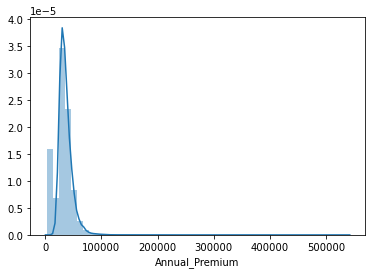

In [21]:
histogram(dataset,'Annual_Premium')

In [59]:
dataset['Annual_Premium'] = np.sqrt(dataset['Annual_Premium'])

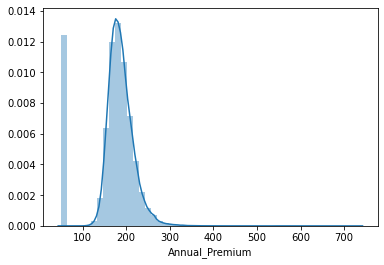

In [60]:
histogram(dataset,'Annual_Premium')

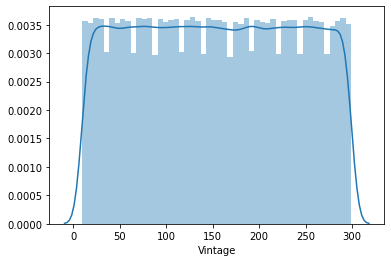

In [22]:
histogram(dataset,'Vintage')

In [23]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

data_scaled = scaler.fit_transform(dataset)

In [24]:

data_scaled = pd.DataFrame(data_scaled,columns = X.columns)

In [25]:
data_scaled.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,-0.923228,0.334938,0.045482,0.120487,-0.920485,2.450727,0.991476,0.577349,-1.584926,0.748905
1,-0.923228,2.399432,0.045482,-1.769885,-0.920485,0.688368,-1.008597,0.173886,-1.584926,0.342540
2,-0.923228,0.528484,0.045482,0.120487,-0.920485,2.450727,0.991476,0.451376,-1.584926,-1.521956
3,-0.923228,-1.148918,0.045482,-1.164966,1.086384,-1.073991,-1.008597,-0.112877,0.737827,0.581578
4,1.083156,-0.632794,0.045482,1.103481,1.086384,-1.073991,-1.008597,-0.178371,0.737827,-1.378534


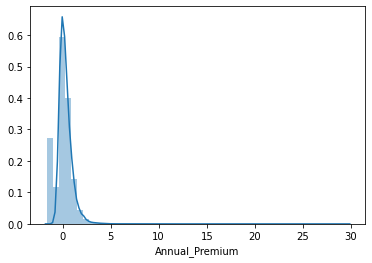

In [26]:
histogram(data_scaled,'Annual_Premium')

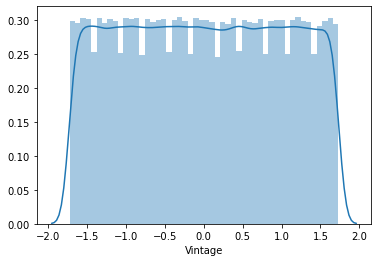

In [27]:
histogram(data_scaled,'Vintage')

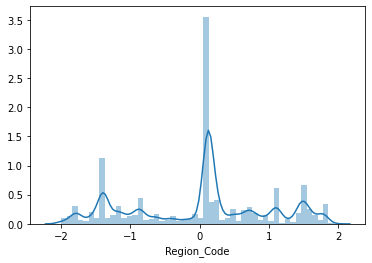

In [28]:
histogram(data_scaled,'Region_Code')

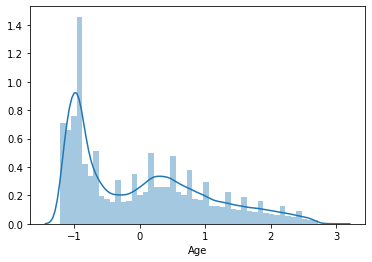

In [29]:
histogram(data_scaled,'Age')

# Normalization

In [30]:
import scipy.stats as stats
import pylab

In [31]:
#QQ plot

def plot_QQ(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(bins=150)
    
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

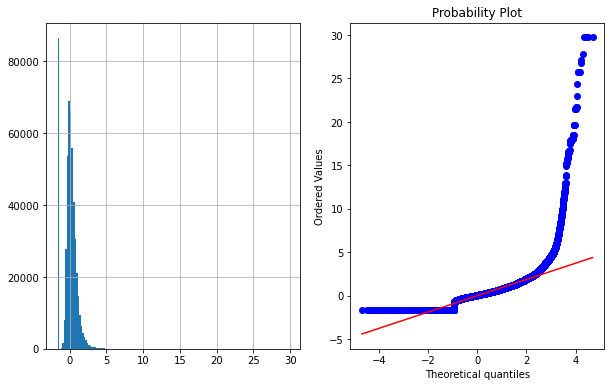

In [32]:
plot_QQ(data_scaled,'Annual_Premium')

In [58]:
data_scaled['Annual_Premium'] = np.sqrt(data_scaled['Annual_Premium'])

C:\Users\bhadaneeraj\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


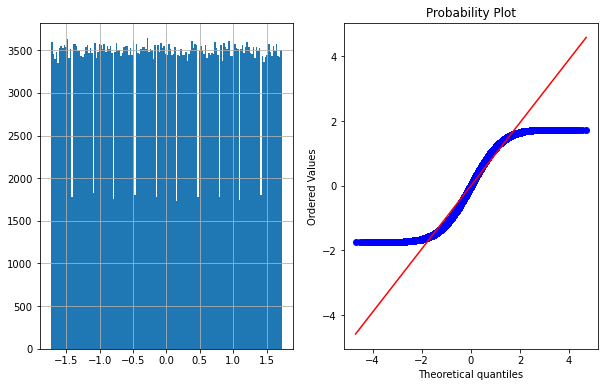

In [33]:
plot_QQ(data_scaled,'Vintage')

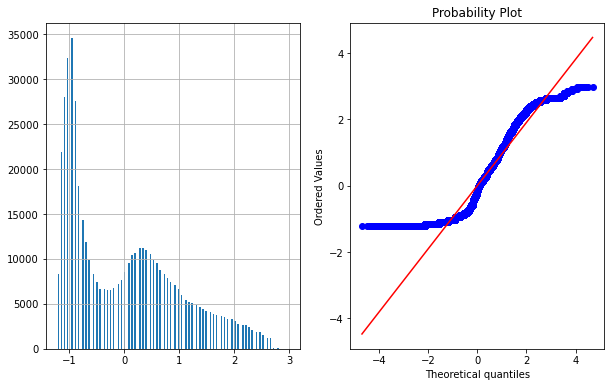

In [34]:
plot_QQ(data_scaled,'Age')

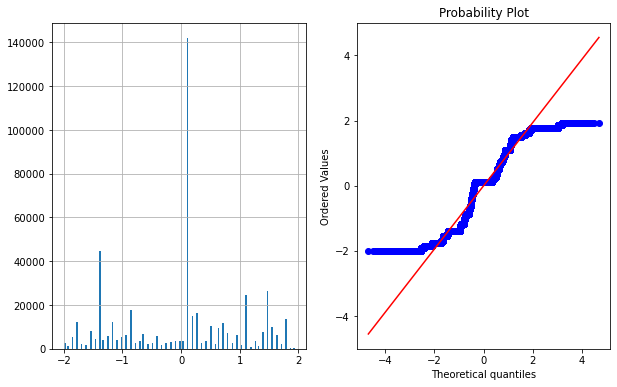

In [35]:
plot_QQ(data_scaled,'Region_Code')

In [36]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [37]:
train_df =data_scaled[:len(train)].copy()
len(train_df)

381109

In [38]:
train_df['Response']=y

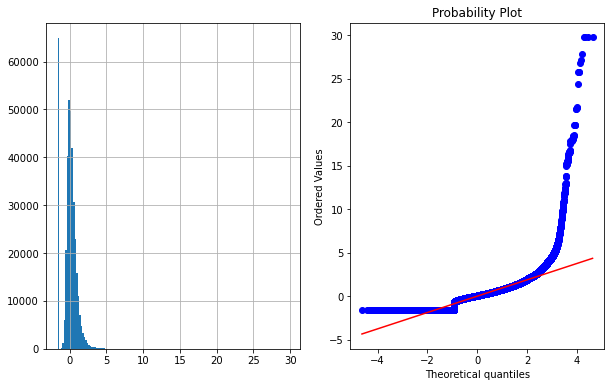

In [39]:
plot_QQ(train_df,'Annual_Premium')

In [40]:
details = analysis(train_df, "Response")
details.sort_values("corr Response",ascending=False)

,types,counts,uniques,nulls,distincts,null_perc,skewness,kurtosis,corr Response
Response,int64,381109,"[1.0, 0.0]",0,2,0.0,2.301906,3.298788,1.000000
Vehicle_Damage,float64,381109,"[0.9914757978641257, -1.0085974888688534]",0,2,0.0,-0.019507,-1.999630,0.354400
Vehicle_Age,float64,381109,"[2.4507265439710406, 0.6883675976944322, -1.07...",0,3,0.0,0.252896,-0.792253,0.221874
Age,float64,381109,"[0.33493754487331556, 2.3994319118723455, 0.52...",0,66,0.0,0.672539,-0.565655,0.111147
Annual_Premium,float64,381109,"[0.5773489409108351, 0.1738860360137343, 0.451...",0,48838,0.0,1.766087,34.004569,0.022575
Region_Code,float64,381109,"[0.12048688142481942, -1.769885495315538, -1.1...",0,53,0.0,-0.115266,-0.867857,0.010570
Driving_License,float64,381109,"[0.04548227957892691, -21.98658486905149]",0,2,0.0,-21.595182,464.354302,0.010155
Vintage,float64,381109,"[0.7489045358212371, 0.34253996372994194, -1.5...",0,290,0.0,0.003030,-1.200688,-0.001050
Gender,float64,381109,"[-0.9232282027798397, 1.083155818885299]",0,2,0.0,0.163590,-1.973249,-0.052440
Policy_Sales_Channel,float64,381109,"[-1.584925693738167, 0.7378273362131303, 0.885...",0,155,0.0,-0.900008,-0.970810,-0.139042


In [41]:
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,-0.923228,0.334938,0.045482,0.120487,-0.920485,2.450727,0.991476,0.577349,-1.584926,0.748905,1
1,-0.923228,2.399432,0.045482,-1.769885,-0.920485,0.688368,-1.008597,0.173886,-1.584926,0.342540,0
2,-0.923228,0.528484,0.045482,0.120487,-0.920485,2.450727,0.991476,0.451376,-1.584926,-1.521956,1
3,-0.923228,-1.148918,0.045482,-1.164966,1.086384,-1.073991,-1.008597,-0.112877,0.737827,0.581578,0
4,1.083156,-0.632794,0.045482,1.103481,1.086384,-1.073991,-1.008597,-0.178371,0.737827,-1.378534,0


In [42]:
test_df =data_scaled[len(train):].copy()
len(test_df)

127037

In [43]:
y = train_df.Response
X = train_df.copy()
X = X.drop('Response',1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [45]:
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

In [46]:
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 234019, 1: 32757})
The number of classes after fit Counter({0: 234019, 1: 234019})


In [47]:
k,from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train_ns,y_train_ns)

SyntaxError: invalid syntax (<ipython-input-47-79c911e15dd3>, line 1)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
y_pred=log_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
submission = pd.read_csv("sample_submission.csv")

In [ ]:
prediction = log_clf.predict(test_df)

In [ ]:
submission.Response = prediction

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission_oversampling_LR.csv', index=False)

In [48]:
import lightgbm

In [ ]:
! pip install lightgbm

In [ ]:
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


#
# Prepare the data
#

train = pd.read_csv('../input/train.csv')

# get the labels
y = train.target.values
train.drop(['id', 'target'], inplace=True, axis=1)

x = train.values

#
# Create training and validation sets
#
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#
# Create the LightGBM data containers
#
categorical_features = [c for c, col in enumerate(train.columns) if 'cat' in col]
train_data = lightgbm.Dataset(x, label=y, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(x_test, label=y_test)


#
# Train the model
#

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.3,
    'bagging_fraction': 0.7,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)
#
# Create a submission
#

submission = pd.read_csv('../input/test.csv')
ids = submission['id'].values
submission.drop('id', inplace=True, axis=1)


x = submission.values
y = model.predict(x)

output = pd.DataFrame({'id': ids, 'target': y})
output.to_csv("submission.csv", index=False)

In [49]:
categorical_features =['Gender','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel']

In [50]:
train_data = lightgbm.Dataset(X_train_ns, label=y_train_ns, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [51]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.01,
    'verbose': 0
}

In [52]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

C:\Users\bhadaneeraj\anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\bhadaneeraj\anaconda3\lib\site-packages\lightgbm\basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Driving_License', 'Gender', 'Policy_Sales_Channel', 'Previously_Insured', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage']
  warnings.warn('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[1]	valid_0's auc: 0.613658

C:\Users\bhadaneeraj\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\bhadaneeraj\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))



Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.811681
[3]	valid_0's auc: 0.829863
[4]	valid_0's auc: 0.83678
[5]	valid_0's auc: 0.83819
[6]	valid_0's auc: 0.836797
[7]	valid_0's auc: 0.838569
[8]	valid_0's auc: 0.839665
[9]	valid_0's auc: 0.839467
[10]	valid_0's auc: 0.841309
[11]	valid_0's auc: 0.840414
[12]	valid_0's auc: 0.841084
[13]	valid_0's auc: 0.84028
[14]	valid_0's auc: 0.841666
[15]	valid_0's auc: 0.841379
[16]	valid_0's auc: 0.842129
[17]	valid_0's auc: 0.842449
[18]	valid_0's auc: 0.842764
[19]	valid_0's auc: 0.843026
[20]	valid_0's auc: 0.842878
[21]	valid_0's auc: 0.843244
[22]	valid_0's auc: 0.843343
[23]	valid_0's auc: 0.843505
[24]	valid_0's auc: 0.843605
[25]	valid_0's auc: 0.843881
[26]	valid_0's auc: 0.843658
[27]	valid_0's auc: 0.843618
[28]	valid_0's auc: 0.843935
[29]	valid_0's auc: 0.844036
[30]	valid_0's auc: 0.844105
[31]	valid_0's auc: 0.844217
[32]	valid_0's auc: 0.844223
[33]	valid_0's auc: 0.844364
[34]	valid_0's auc: 

[262]	valid_0's auc: 0.847196
[263]	valid_0's auc: 0.847187
[264]	valid_0's auc: 0.847186
[265]	valid_0's auc: 0.847199
[266]	valid_0's auc: 0.847194
[267]	valid_0's auc: 0.847194
[268]	valid_0's auc: 0.847195
[269]	valid_0's auc: 0.847205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's auc: 0.847206
[271]	valid_0's auc: 0.847234
[272]	valid_0's auc: 0.84724
[273]	valid_0's auc: 0.847232
[274]	valid_0's auc: 0.847248
[275]	valid_0's auc: 0.847248
[276]	valid_0's auc: 0.847251
[277]	valid_0's auc: 0.847266
[278]	valid_0's auc: 0.847265
[279]	valid_0's auc: 0.847269
[280]	valid_0's auc: 0.847271
[281]	valid_0's auc: 0.847271
[282]	valid_0's auc: 0.847298
[283]	valid_0's auc: 0.847308
[284]	valid_0's auc: 0.847309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[285]	valid_0's auc: 0.847319
[286]	valid_0's auc: 0.847312
[287]	valid_0's auc: 0.84733
[288]	valid_0's auc: 0.847331
[289]	valid_0's auc: 0.84733
[290]	valid_0

[518]	valid_0's auc: 0.848264
[519]	valid_0's auc: 0.848266
[520]	valid_0's auc: 0.848266
[521]	valid_0's auc: 0.84827
[522]	valid_0's auc: 0.848274
[523]	valid_0's auc: 0.848277
[524]	valid_0's auc: 0.848284
[525]	valid_0's auc: 0.848286
[526]	valid_0's auc: 0.848286
[527]	valid_0's auc: 0.848286
[528]	valid_0's auc: 0.848286
[529]	valid_0's auc: 0.848291
[530]	valid_0's auc: 0.848298
[531]	valid_0's auc: 0.848298
[532]	valid_0's auc: 0.848305
[533]	valid_0's auc: 0.848306
[534]	valid_0's auc: 0.848306
[535]	valid_0's auc: 0.84831
[536]	valid_0's auc: 0.848316
[537]	valid_0's auc: 0.848316
[538]	valid_0's auc: 0.848318
[539]	valid_0's auc: 0.84832
[540]	valid_0's auc: 0.848324
[541]	valid_0's auc: 0.848325
[542]	valid_0's auc: 0.848326
[543]	valid_0's auc: 0.848327
[544]	valid_0's auc: 0.848328
[545]	valid_0's auc: 0.84833
[546]	valid_0's auc: 0.848329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[547]	valid_0's auc: 0.848334
[548]	valid_0's auc: 0.848333

[782]	valid_0's auc: 0.848392
[783]	valid_0's auc: 0.848392
[784]	valid_0's auc: 0.848395
[785]	valid_0's auc: 0.848395
[786]	valid_0's auc: 0.8484
[787]	valid_0's auc: 0.848397
[788]	valid_0's auc: 0.848397
[789]	valid_0's auc: 0.848397
[790]	valid_0's auc: 0.848396
[791]	valid_0's auc: 0.8484
[792]	valid_0's auc: 0.848401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[793]	valid_0's auc: 0.848406
[794]	valid_0's auc: 0.848406
[795]	valid_0's auc: 0.848407
[796]	valid_0's auc: 0.848409
[797]	valid_0's auc: 0.848409
[798]	valid_0's auc: 0.848408
[799]	valid_0's auc: 0.848408
[800]	valid_0's auc: 0.848409
[801]	valid_0's auc: 0.848407
[802]	valid_0's auc: 0.848407
[803]	valid_0's auc: 0.848406
[804]	valid_0's auc: 0.848407
[805]	valid_0's auc: 0.848406
[806]	valid_0's auc: 0.848406
[807]	valid_0's auc: 0.848405
[808]	valid_0's auc: 0.848401
[809]	valid_0's auc: 0.848402
[810]	valid_0's auc: 0.848402
[811]	valid_0's auc: 0.848403
[812]	valid_0's auc: 0.848402

[1035]	valid_0's auc: 0.848459
[1036]	valid_0's auc: 0.848462
[1037]	valid_0's auc: 0.848462
[1038]	valid_0's auc: 0.848462
[1039]	valid_0's auc: 0.848458
[1040]	valid_0's auc: 0.848457
[1041]	valid_0's auc: 0.848459
[1042]	valid_0's auc: 0.84846
[1043]	valid_0's auc: 0.848458
[1044]	valid_0's auc: 0.848458
[1045]	valid_0's auc: 0.848458
[1046]	valid_0's auc: 0.848454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1047]	valid_0's auc: 0.848454
[1048]	valid_0's auc: 0.848454
[1049]	valid_0's auc: 0.848454
[1050]	valid_0's auc: 0.848453
[1051]	valid_0's auc: 0.848453
[1052]	valid_0's auc: 0.848449
[1053]	valid_0's auc: 0.848449
[1054]	valid_0's auc: 0.848444
[1055]	valid_0's auc: 0.848446
[1056]	valid_0's auc: 0.848443
[1057]	valid_0's auc: 0.848443
[1058]	valid_0's auc: 0.848438
[1059]	valid_0's auc: 0.848437
[1060]	valid_0's auc: 0.848434
[1061]	valid_0's auc: 0.848436
[1062]	valid_0's auc: 0.848432
[1063]	valid_0's auc: 0.848431
[1064]	valid_0's auc: 0.848

In [ ]:
print(accuracy_score())

In [53]:
submission = pd.read_csv("sample_submission.csv")

In [54]:
prediction = model.predict(test_df)

In [55]:
submission.Response = prediction

In [57]:
submission.to_csv('lgbm_hyperparam3.csv', index=False)